In [2]:
import pandas as pd

In [15]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df

In [139]:
X = df.drop("Outcome",axis=1)

In [140]:
y = df["Outcome"]

In [13]:
from sklearn.model_selection import train_test_split

In [141]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.25 , random_state = 25)

In [26]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
scaler = MinMaxScaler()

In [143]:
X_train = scaler.fit_transform(X_train)

In [144]:
X_test = scaler.transform(X_test)

In [161]:
model = Sequential()
model.add(Dense(X_train.shape[1],activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [162]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [163]:
history = model.fit(X_train,Y_train,epochs=250,batch_size=30)

Epoch 1/250
20/20 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5660
Epoch 2/250
20/20 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6458
Epoch 3/250
20/20 [==============================] - 0s 2ms/step - loss: 0.6531 - accuracy: 0.6441
Epoch 4/250
20/20 [==============================] - 0s 2ms/step - loss: 0.6480 - accuracy: 0.6424
Epoch 5/250
20/20 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6441
Epoch 6/250
20/20 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6510
Epoch 7/250
20/20 [==============================] - 0s 2ms/step - loss: 0.6356 - accuracy: 0.6562
Epoch 8/250
20/20 [==============================] - 0s 2ms/step - loss: 0.6311 - accuracy: 0.6580
Epoch 9/250
20/20 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.6597
Epoch 10/250
20/20 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.6667
Epoch 11/

In [160]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]

In [65]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


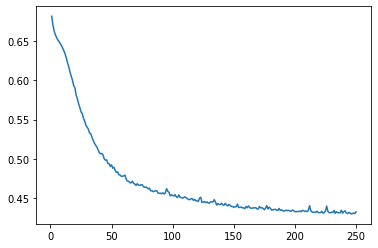

In [156]:
sns.lineplot(list(range(1,len(loss)+1)),loss)

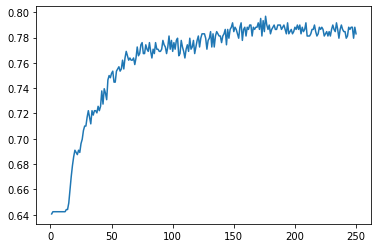

In [157]:
sns.lineplot(list(range(1,len(loss)+1)),accuracy)

In [158]:
pred = model.predict(X_test)

In [49]:
import numpy as np

In [46]:
from sklearn.metrics import accuracy_score

In [159]:
accuracy_score(Y_test,np.round(pred))

0.8072916666666666